In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [3]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [5]:
X_st = X.copy().astype(np.float64)

for i in range(X_st.shape[1]-1):
    X_st[:, i+1] = min_max_scale(X_st[:, i+1])

In [6]:
X_st

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [7]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    list_of_err = []
    list_of_W_0 = []
    list_of_W_1 = []
    list_of_W_2 = []
    list_of_W_3 = []
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
        
        list_of_err.append(err)
        list_of_W_0.append(W[0])
        list_of_W_1.append(W[1])
        list_of_W_2.append(W[2])
        list_of_W_3.append(W[3])
       
       
        
    fig,axs = plt.subplots(1, 2, figsize=(15, 4))
    ax1, ax2 = axs
    ax1.plot(list_of_W_0, label = 'first_W')
    ax1.plot(list_of_W_1, label = 'second_W')
    ax1.plot(list_of_W_2, label = 'third_W')
    ax1.plot(list_of_W_3, label = 'four_W')
    ax1.set_xlabel('Колличество итераций')
    ax1.set_ylabel('Веса')
    
    ax2.plot(list_of_err[10:])
    ax2.set_xlabel('Колличество итераций')
    ax2.set_ylabel('Ошибка')
        
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W , list_of_W_0, list_of_W_1, list_of_W_2, list_of_W_3

Iter: 0, weights: [ 1.99548432  2.19478602 -1.31206521  0.05940031], error 3279.9447437805793
Iter: 100, weights: [29.68265131 10.70433737 10.29414449 11.56486027], error 290.2740603731994
Iter: 200, weights: [30.40560106 10.46255101 10.67653339 11.64310539], error 263.961259970394
Iter: 300, weights: [30.45989903 10.32248903 10.750075   11.60559525], error 263.35909936391784
Iter: 400, weights: [30.47084547 10.27477396 10.77828872 11.59462742], error 263.33624781993797
Iter: 500, weights: [30.47353879 10.2586975  10.78918471 11.59159868], error 263.33637191920485
Iter: 600, weights: [30.47422168 10.25323093 10.79328162 11.59071429], error 263.3376183959478
Iter: 700, weights: [30.47439771 10.25135757 10.79479483 11.59043772], error 263.3383310145087
Iter: 800, weights: [30.47444389 10.2507119  10.79534746 11.59034551], error 263.3386475692379
Iter: 900, weights: [30.47445624 10.25048844 10.79554782 11.59031316], error 263.3387748746992
Final MSE: 263.3388235382707


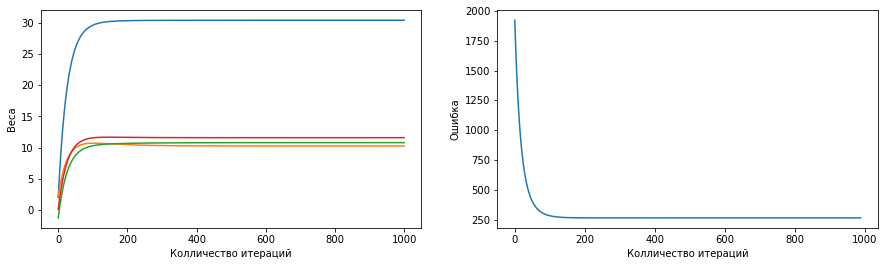

In [8]:
W = gradient_descent_reg_l2(X_st, y, iterations=1000, eta=1e-2, reg=1e-2)

Iter: 0, weights: [1.1833712  1.08792768 0.5954515  0.03524772], error 3333.1847635946565
Iter: 100, weights: [37.64298299 13.28571942 13.7321772  14.17457743], error 59.27372794906411
Iter: 200, weights: [40.39386534 13.67398424 13.48204741 14.03339525], error 36.8601997517675
Iter: 300, weights: [41.05540457 13.62150423 12.84028243 13.52078028], error 34.61696446747551
Iter: 400, weights: [41.39920163 13.63699739 12.3652429  13.20599248], error 33.74158884663622
Iter: 500, weights: [41.60132656 13.70186937 12.018148   13.03017253], error 33.26640935728042
Iter: 600, weights: [41.7214525  13.78952435 11.75574766 12.93759316], error 32.97583380797984
Iter: 700, weights: [41.79285131 13.8842528  11.55038011 12.89391334], error 32.78312973535605
Iter: 800, weights: [41.83525188 13.97752134 11.38472834 12.87858505], error 32.64687690658589
Iter: 900, weights: [41.86041221 14.0650024  11.24778939 12.87936078], error 32.54551638761899
Final MSE: 32.46703559962374


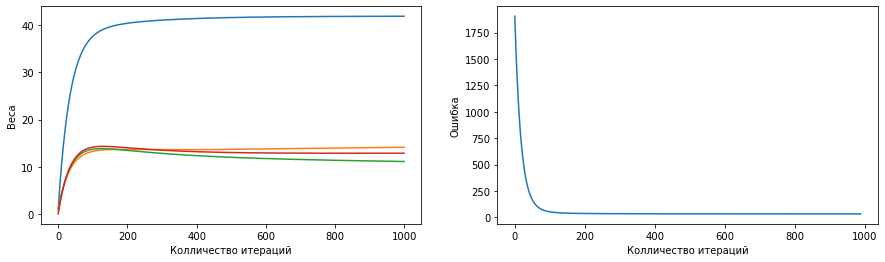

In [9]:
W = gradient_descent_reg_l2(X_st, y, iterations=1000, eta=1e-2, reg=1e-3)


Iter: 0, weights: [ 1.31791235  0.88183672 -0.59379686  1.61548302], error 3302.9879473853703
Iter: 100, weights: [38.67625452 13.40547625 12.81678686 15.87982661], error 47.596501933047385
Iter: 200, weights: [41.8075189  13.9034679  12.53891576 15.56795436], error 31.825243327022235
Iter: 300, weights: [42.64678567 13.90598667 11.76708946 14.81031492], error 29.754460075113904
Iter: 400, weights: [43.12357223 13.9947176  11.15306479 14.27690201], error 28.77328433603436
Iter: 500, weights: [43.42790871 14.15699221 10.67194165 13.92108303], error 28.23763618319044
Iter: 600, weights: [43.62343418 14.36266776 10.28184629 13.6847961 ], error 27.905149301892727
Iter: 700, weights: [43.74831135 14.5911395   9.95386737 13.52836698], error 27.670771936731363
Iter: 800, weights: [43.82727846 14.82920343  9.66893282 13.42561804], error 27.487647710619285
Iter: 900, weights: [43.87648002 15.06854077  9.41448437 13.35929036], error 27.334249650022098
Final MSE: 27.200234075452908


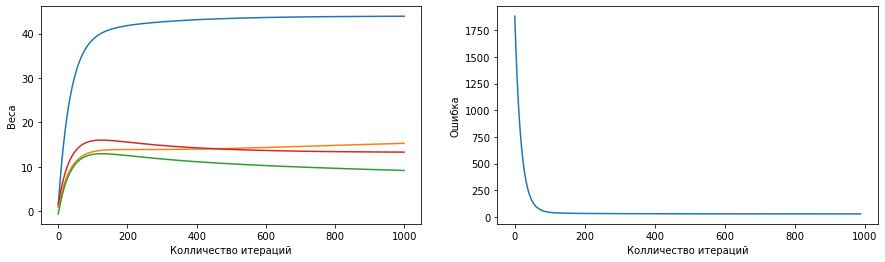

In [10]:
W = gradient_descent_reg_l2(X_st, y, iterations=1000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [-0.03084358 -1.04040059  0.43820203 -0.34094297], error 3592.0338135172024
Iter: 100, weights: [38.87445874 12.2002039  14.56815859 14.80228306], error 47.70679164313217
Iter: 200, weights: [42.05753968 12.82339038 14.32380592 14.6226933 ], error 32.24768980311493
Iter: 300, weights: [42.87044511 12.89779324 13.51919432 13.92072814], error 30.38051304419174
Iter: 400, weights: [43.32967191 13.04782234 12.85659486 13.4232287 ], error 29.440658168473345
Iter: 500, weights: [43.62491622 13.2669773  12.31922238 13.09379049], error 28.897523207547714
Iter: 600, weights: [43.81621643 13.52738532 11.86853983 12.87880366], error 28.53744266984996
Iter: 700, weights: [43.93945109 13.8095928  11.47749444 12.7410732 ], error 28.266520458519288
Iter: 800, weights: [44.01806233 14.1009712  11.12808707 12.65582799], error 28.042964827005427
Iter: 900, weights: [44.06748761 14.3934532  10.80837814 12.60659318], error 27.847779251756712
Final MSE: 27.671988037152175


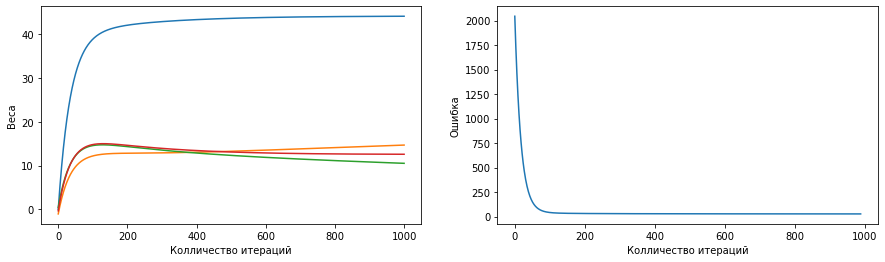

In [11]:
W = gradient_descent_reg_l2(X_st, y, iterations=1000, eta=1e-2, reg=1e-5)


Вывод при большом параметре lambda модель перестает обучаться , при малой lambda модели требуется большее колличество итераций для схождения, и MSE приблежается к значению без использованию регуляризации 

## Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [12]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    list_of_err = []
    list_of_W_0 = []
    list_of_W_1 = []
    list_of_W_2 = []
    list_of_W_3 = []
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
        
        list_of_err.append(err)
        list_of_W_0.append(W[0])
        list_of_W_1.append(W[1])
        list_of_W_2.append(W[2])
        list_of_W_3.append(W[3])
       
       
        
    fig,axs = plt.subplots(1, 2, figsize=(15, 4))
    ax1, ax2 = axs
    ax1.plot(list_of_W_0, label = 'first_W')
    ax1.plot(list_of_W_1, label = 'second_W')
    ax1.plot(list_of_W_2, label = 'third_W')
    ax1.plot(list_of_W_3, label = 'four_W')
    ax1.set_xlabel('Колличество итераций')
    ax1.set_ylabel('Веса')
    
    ax2.plot(list_of_err[10:])
    ax2.set_xlabel('Колличество итераций')
    ax2.set_ylabel('Ошибка')
        
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W , list_of_W_0, list_of_W_1, list_of_W_2, list_of_W_3

Iter: 0, weights: [-0.14227836 -0.4213283   0.54680542  0.18498803], error 3447.4463629527563
Iter: 1000, weights: [43.5956655  13.53932666 12.10281441 13.18194937], error 28.756052768012
Iter: 2000, weights: [44.11594892 14.88705924 10.2794646  12.63409517], error 27.546050955354495
Iter: 3000, weights: [44.1588641  16.16953939  8.98756616 12.70024985], error 26.8786056136124
Iter: 4000, weights: [44.15247863 17.2164401   7.88026168 12.89491527], error 26.404940910219818
Iter: 5000, weights: [44.14747403 18.05732988  6.90034596 13.13523754], error 26.058846264874337
Iter: 6000, weights: [44.14785864 18.73491403  6.02876715 13.3954084 ], error 25.800845440738208
Iter: 7000, weights: [44.15240197 19.28442202  5.25271453 13.66146726], error 25.605364496016534
Iter: 8000, weights: [44.15968992 19.73321133  4.56140458 13.92436455], error 25.455342500238412
Iter: 9000, weights: [44.16863892 20.10238068  3.94538658 14.17816123], error 25.33906800274609
Final MSE: 25.248278133091013


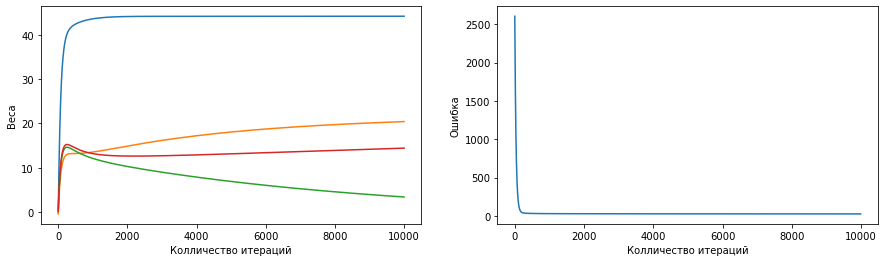

In [13]:
W = gradient_descent_reg_l1(X_st, y, iterations=10000, eta=1e-3, reg=1e-5)

### *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Можно применить

### *Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [14]:
X, Y, coef = datasets.make_regression(n_samples=20000, n_features=10, n_informative=8, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X[:, 0] *= 10


In [15]:
err_gradient_descent = []
err_stohastic_gradient_descent = []

In [16]:
def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std


In [17]:
X_st = X.copy().astype(np.float64)

for i in range(X_st.shape[1]):
    X_st[:, i] = standart_scale(X_st[:, i])

In [18]:
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        
        err_gradient_descent.append(err)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
            print('================================================================================================')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]

            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)

            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
        
        err_stohastic_gradient_descent.append(err)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
            print('================================================================================================')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    
    return W

In [19]:
gradient_descent(X_st, Y, iterations=5000, eta=1e-3)

Iter: 0, weights: [-0.93605403  0.74242989 -0.53497657 -0.68747156 -0.7180395   1.30452454
  2.05537737 -0.98462785 -0.08506815  0.9701947 ], error 27499.547703448065
Iter: 500, weights: [ 3.26306388e+01  6.18643297e+01  3.42307496e+01  3.69659429e+01
  2.35415541e+00  5.38027228e+01  7.17908263e-01  6.62491664e+00
 -1.57983294e-02  2.63680373e+01], error 3680.9424749091568
Iter: 1000, weights: [ 4.49940174e+01  8.42384553e+01  4.67647987e+01  5.10858395e+01
  3.52303695e+00  7.25709481e+01  2.48381037e-01  9.41259628e+00
 -8.09718448e-03  3.56831286e+01], error 511.73407994603383
Iter: 1500, weights: [ 4.95468201e+01  9.24324976e+01  5.12843674e+01  5.63800676e+01
  3.96592395e+00  7.92762399e+01  8.12430688e-02  1.04356504e+01
 -1.20340868e-02  3.91003171e+01], error 89.65146741311729
Iter: 2000, weights: [ 5.12230597e+01  9.54348257e+01  5.29143147e+01  5.83648959e+01
  4.13309481e+00  8.16701189e+01  2.08214622e-02  1.08117728e+01
 -1.60589774e-02  4.03541514e+01], error 33.3825486

array([ 5.21969642e+01,  9.71689158e+01,  5.38320947e+01,  5.95517015e+01,
        4.23330300e+00,  8.29939973e+01, -1.46952664e-02,  1.10308520e+01,
       -2.08651610e-02,  4.10794172e+01])

In [20]:
stohastic_gradient_descent(X_st, Y, iterations=5000, batch_size=500, eta=1e-4)

amount of batches is 40
Iter: 0, weights: [ 1.60118061  0.49639826  1.0367063   1.16635451  0.51863093  0.5431638
  0.41971783 -0.23321167 -0.68660296  1.29899849], error 25901.21992682375
Iter: 500, weights: [ 5.12666628e+01  9.54274628e+01  5.29395284e+01  5.83962162e+01
  4.15231710e+00  8.16481148e+01 -1.11041537e-02  1.08255925e+01
 -2.19857644e-02  4.03579648e+01], error 30.38545349915214
Iter: 1000, weights: [ 5.21822395e+01  9.71415207e+01  5.38189305e+01  5.95320543e+01
  4.23189854e+00  8.29748942e+01 -1.47050791e-02  1.10275472e+01
 -2.06435330e-02  4.10679674e+01], error 22.559190597117244
Iter: 1500, weights: [ 5.21990648e+01  9.71727176e+01  5.38338686e+01  5.95545566e+01
  4.23351201e+00  8.29963177e+01 -1.48494287e-02  1.10313490e+01
 -2.08310965e-02  4.10809122e+01], error 22.562438573209207
Iter: 2000, weights: [ 5.21993731e+01  9.71732903e+01  5.38341232e+01  5.95550019e+01
  4.23354289e+00  8.29966572e+01 -1.48565131e-02  1.10314226e+01
 -2.08387236e-02  4.10811489e

array([ 5.21993788e+01,  9.71733012e+01,  5.38341277e+01,  5.95550109e+01,
        4.23354346e+00,  8.29966625e+01, -1.48567914e-02,  1.10314241e+01,
       -2.08389526e-02,  4.10811533e+01])

Text(0, 0.5, 'Errors')

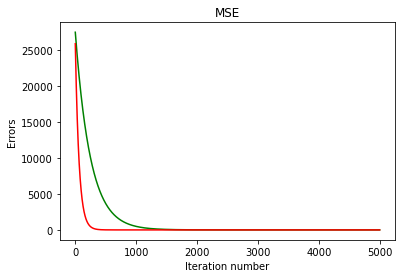

In [21]:
plt.plot(err_gradient_descent, color='green')
plt.plot(err_stohastic_gradient_descent, color='red')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('Errors')